<div style="border:solid green 2px; padding: 20px">
<b>Привет, Алексей!</b>

Меня зовут Лутченкова Екатерина, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — помочь тебе разобраться в материале, поделиться своим опытом и помочь тебе стать крутым специалистом.

Ниже ты найдешь мои комментарии, они будут в отдельных ячейках Markdown с заголовком «Комментарий ревьюера». **Пожалуйста, не перемещай, не изменяй и не удаляй их**. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки я не смогу принять твой проект. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Сравнение-с-константными-моделями" data-toc-modified-id="Сравнение-с-константными-моделями-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Сравнение с константными моделями</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Первым шагом выполним импорт необходимых библиотек и данных для выполнения работы.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Данные по дате и времени хранятся в первом столбце таблицы. Сразу преобразуем ее в индекс Datetime.

In [2]:
df = pd.read_csv('/datasets/taxi.csv',
                 parse_dates=[0],
                 index_col=[0])

Успешно загрузили необходимые инструменты для работы и данные для анализа.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Молодец, что столбец `datetime` сразу читаешь в формате даты и в качестве индекса.
</div>

## Анализ

Следующим шагом выполним анализ данных:
- проверим являются ли данные монотонно возрастающими
- выполним ресемплирование данных по одному часу
- разложим временной ряд на тренд, сезонную составляющую и построим их графики

Проверим индекс на монотонность.

In [3]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
df.index.is_monotonic

True

Индекс монотонен.

Проведем ресемплирование.

In [5]:
df = df.resample('1H').sum()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Верно, ресемплирование по часу здесь самое подходящее. А еще хорошо, что ты берешь сумму, это наиболее правильно в плане интерпретации.
</div>

Теперь разложим временной рад на составляющие.

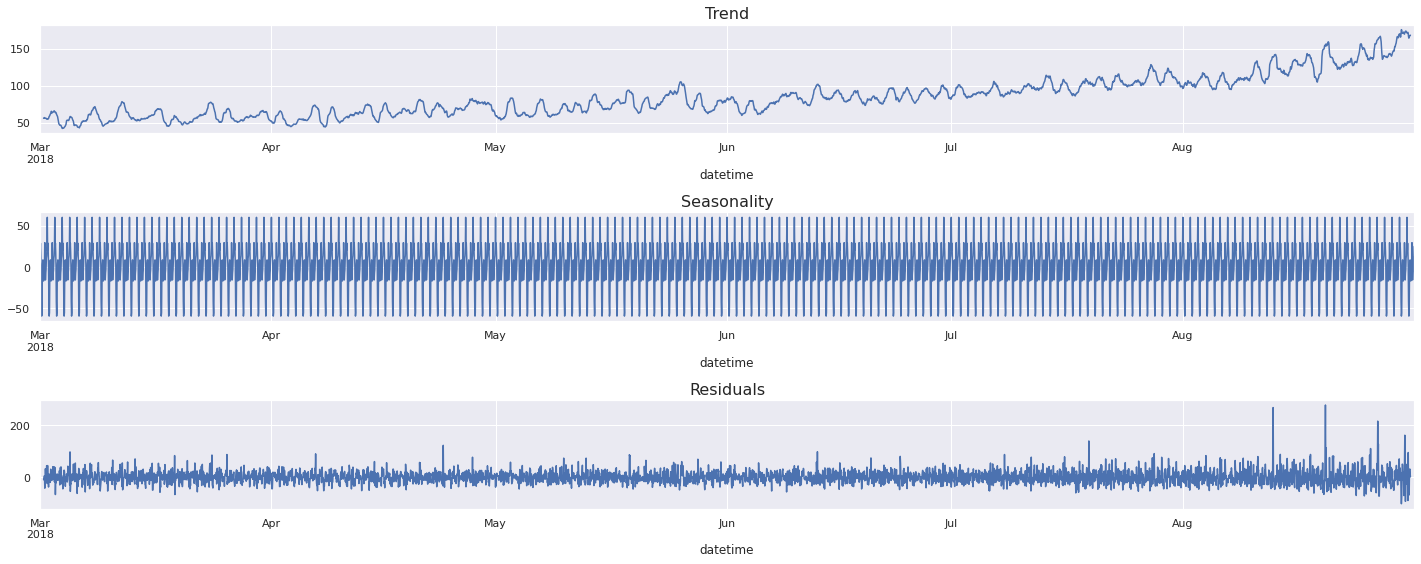

In [6]:
decomposed = seasonal_decompose(df.num_orders)

plt.figure(figsize=(20, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend', size=16)

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality', size=16)

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals', size=16)

plt.tight_layout()

<AxesSubplot:xlabel='datetime'>

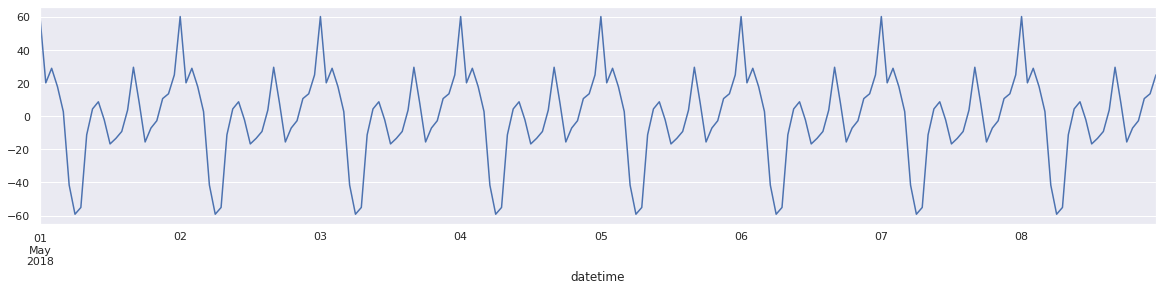

In [7]:
decomposed.seasonal['2018-05-01':'2018-05-08'].plot(figsize=(20, 4))

- Наблюдается постепенное увеличение количества заказов с небольшими колебаниями на протяжении всего имеющегося периода
- Прослеживается сезонность, скорее всего привязанная к активности людей в течение суток

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Да, все верно. Можно еще рассмотреть сутки подробнее, чтобы понять, в какие часы наиболее много и наиболее мало поездок.
</div>

Проверяем стационарность ряда (Расширенный тест Дики — Фуллера)

- Нулевая гипотеза: ряд не стационарен
- Альтернативная: ряд стационарен

In [8]:
test_stat, p_val, _, _, crit_val, _ = sts.adfuller(df.num_orders)

In [9]:
test_stat

-3.0689242890279558

In [10]:
p_val

0.028940051402612906

In [11]:
crit_val

{'1%': -3.431842162413052,
 '5%': -2.8621993540813637,
 '10%': -2.567120978470452}

p-значение меньше 0.05, значение статистики меньше критических на 5% и 10% уровнях значимости: нулевую гипотезу можно отвергнуть и признать ряд стационарным

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Супер! за Дики-Фуллера хвалю.
</div>

### Подготовка данных

Зададим функцию для создания дополнительных признаков: календарных, отстающих значений скользящего среднего; и разделения на обучающую и тестовую выборки

отстающие значения добавляем за предыдущий период, затем за сутки и т.д вплоть до 168 часов

In [12]:
def make_features(data, rolling_mean_size):
    df = data.copy()
    
    df.columns = ["y"]

    df['lag_1']=df.y.shift(1)
    for i in range(24, 169, 24):
        df["lag_{}".format(i)] = df.y.shift(i)
       
    df['rolling_mean'] = df['y'].shift().rolling(rolling_mean_size).mean()
    df["hour"] = df.index.hour
    df["weekday"] = df.index.weekday
    df['is_weekend'] = df.weekday.isin([5,6])*1
    
    return df

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Здесь все супер. В статье можно подробнее почитать о том, как поббирать параметры: https://habr.com/ru/post/207160/.
</div>

Выбираем размер скользящего окна 24 часа, создаём набор данных с новыми признаками и отделяем целевой

In [13]:
with_features = make_features(df, 24)
X = with_features.drop(columns = 'y')
y = with_features.y

Разбиваем на обучающую и тестовую выборки

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = False)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Разбиение на выборки верное. Здорово, что добавлен параметр `shuffle=False`, чтобы значения не перемешались.

</div>

In [15]:
X_train.dropna().index[0]

Timestamp('2018-03-08 00:00:00', freq='H')

In [16]:
X_train = X_train.dropna()

In [17]:
y_train = y_train.loc['2018-03-08 00:00:00':]

Отстающие значения - численные признаки, их стандартизируем

In [18]:
num_cols = [x for x in with_features.columns if x.startswith('lag') ]

In [19]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

## Обучение

Для обучения выберем несколько моделей:

- Случайный лес
- LightGMB
- Гребневую регрессию
- Лассо

Для каждой модели зададим некоторое поле параметров для перебора GridSearchCV

Переберём модели, сохраним результаты кросс-валидации и лучшую модель

In [20]:
models = [RandomForestRegressor(random_state=42),
          LGBMRegressor(random_state=42),
          Ridge(random_state=42),
          Lasso(random_state=42)
         ]

param_grid = [{'n_estimators': [50, 100, 200],
             'max_depth': [5, 10, 15]},
              
              {'max_depth': [2, 4, 8],
               'num_leaves': [2, 4, 8],
               'learning_rate': [0.05, 0.1, 0.5]},
              
              {'alpha': np.logspace(0,3,4)},
              
              {'alpha': np.logspace(0,3,4)}]

cv = TimeSeriesSplit(n_splits=8)
results = []
best_score = 10000
best_model = None
for i, model in enumerate(models):
    grid_search = GridSearchCV(estimator=model,
                          param_grid=param_grid[i],
                          cv = cv,
                          scoring = 'neg_mean_squared_error')
    result = grid_search.fit(X_train, y_train)
    cv_results = pd.DataFrame(result.cv_results_)[['mean_test_score',
                                                   'std_test_score',
                                                   'mean_fit_time',
                                                   'mean_score_time',
                                                   'rank_test_score']]
    cv_results['Model'] = str(model).split('(')[0]
    cv_results['RMSE'] = np.sqrt(abs(cv_results['mean_test_score']))
    if cv_results['RMSE'].min() < best_score:
        best_score=cv_results['RMSE'].min()
        best_model = result.best_estimator_
    results.append(cv_results)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Отлично, правильная кросс-валидация для этой задачи.
</div>

In [21]:
pd.concat([result for result in results], axis=0).sort_values(by='RMSE', ascending = True).reset_index(drop=True)

,mean_test_score,std_test_score,mean_fit_time,mean_score_time,rank_test_score,Model,RMSE
0,-490.330146,156.409639,0.002889,0.010475,1,Ridge,22.143400
1,-491.467774,155.312124,0.011509,0.001824,2,Ridge,22.169072
2,-492.224773,154.742698,0.021385,0.001861,3,Ridge,22.186139
3,-494.350793,158.408860,0.036739,0.002940,1,Lasso,22.234001
4,-511.129281,170.713101,0.780499,0.014943,1,RandomForestRegressor,22.608168
5,-511.454616,169.622700,1.537160,0.026855,2,RandomForestRegressor,22.615362
6,-513.513175,167.061070,0.148601,0.036681,1,LGBMRegressor,22.660829
7,-513.513175,167.061070,0.148644,0.025459,1,LGBMRegressor,22.660829
8,-514.131960,160.087964,0.173133,0.025461,3,LGBMRegressor,22.674478
9,-514.131960,160.087964,0.196766,0.014340,3,LGBMRegressor,22.674478


После кросс-валидации с перебором гиперпараметров три лучших результата у Гребневой регрессии.

Параметры модеди с лучшим результатом ниже

In [22]:
best_model

Ridge(alpha=100.0, random_state=42)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Все супер, четко.
</div>

## Тестирование

In [23]:
predictions = best_model.predict(X_test)
print("RMSE на тестовой выборке", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE на тестовой выборке 34.620300220901356


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера (исправлено):</b> 
    
Давай тут еще построим график с реальным и предсказанным значением тестовой выборки. Интересно, как все это дело выглядит. 

Как ты думаешь, какие результаты можно считать приемлемыми? Ты построил так много классных моделей, обучил их, получил довольно низкие значения RMSE. Но что, если константное предсказание результат лучше, чем твоя модель? Давай посчитаем значение метрики на любой простейшей модели (на твой выбор - среднее, предыдущее, DummyRegressor) и оценим результат.  
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Принято, ниже добавил сравнение на графиках и привел сравнение RMSE по 2м константным моделям.</div>

In [59]:
df_test = pd.DataFrame(predictions, columns = ['prediction']).set_index(y_test.index)
results_comparison = pd.concat([y_test, df_test], axis=1)

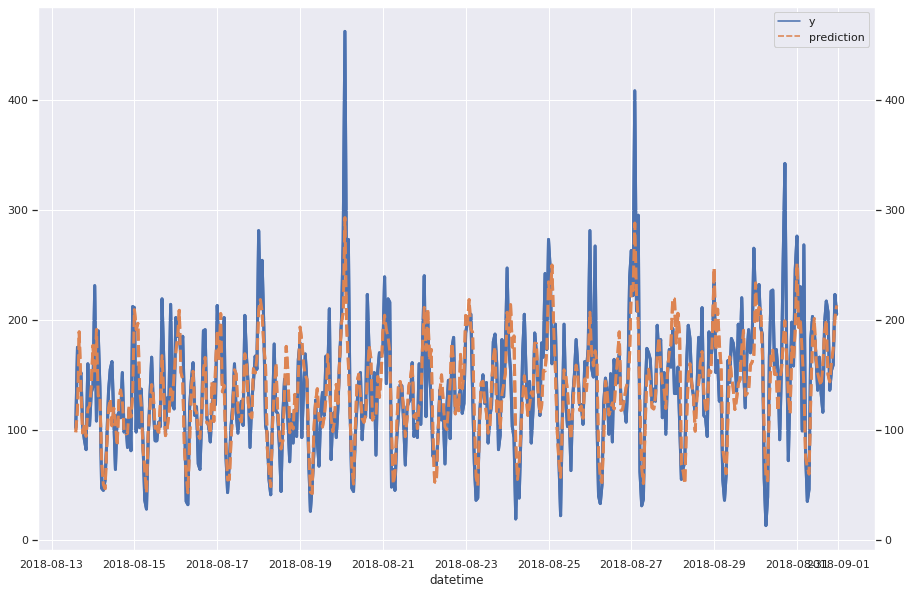

In [78]:
fig, ax = plt.subplots()
sns.lineplot(data=results_comparison, ax=ax, linewidth=3)
ax2 = ax.twinx()
sns.lineplot(data=results_comparison, ax=ax2, linewidth=3)
sns.set(rc={'figure.figsize':(20,10)})

Оценивая графики предсказанных и тестовых значений можно сделать вывод, что предсказанные значения получаются чуть более "сглаженные" - по предсказаниям не так четко прослеживаются некоторые пики по тестовой выборке (но тут наверно можно сделать ремарку, что такие пиковые экстремальные значения скорее являются исключением, а не нормой, поэтому модель не настраивалась на них), но в целом тренд на рост по предсказанным значениям, при резких ростах на тестовой выборке, присутствует, значит модель с некоторыми допущениями, тоже может предсказать пиковые интервалы. 

### Сравнение с константными моделями

Сделаем 2 константные модели - по среднему и по предыдущим значениям.

In [30]:
print("Средний значение заказов в час по тестовой выборке:", y_test.mean())

pred_median = np.ones(y_test.shape) * y_train.median()
print("RMSE по константной модели среднего:", np.sqrt(mean_squared_error(y_test, pred_median)))

pred_previous = y_test.shift()
pred_previous.iloc[0] = y_train.iloc[-1]
print("RMSE по константной модели предыдущего:", np.sqrt(mean_squared_error(y_test, pred_previous)))

Средний значение заказов в час по тестовой выборке: 139.55656108597285
RMSE по константной модели среднего: 86.41465855206327
RMSE по константной модели предыдущего: 58.856486242815066


Предсказание по простейшим моделям показывают значения метрики RMSE хуже, чем наша обученная модель гребневой регресии, тест на адекватность пройден, можно рекомендовать использовать модель гребневой регрессии.

## Вывод

Имеющийся временной ряд был ресемплирован по одному часу.

При декомпозиции обнаружена явная сезонность с периодом в 1 сутки.

По результатам расширенного теста Дики-Фулера временной ряд можно с признать стационарным (критическое значение для 1% уровня значимости -3.43 меньше результата теста -3.06).

Для прогнозирования были добавлены дополнительные признаки: отстающие значения вплоть до недели, скользящее среднее за сутки и календарные: рабочий/нерабочий день, час, день недели.

Набор разбит на обучающую и тестовую выборки. Обучено и проверено путём кросс-валидации с перебором параметров несколько моделей, из которых лучше всего себя показала Гребневая регрессия с коэффициентом регуляризации alpha равным 100: среднее RMSE - 22.9

На тестовой выборке результат RMSE: 34.85; но удовлетворяет условиям задачи, поэтому данная модель может быть рекомендована к использованию.

<div style="border:solid green 2px; padding: 20px">
    
Спасибо за твою работу, все шаги выполнены.
    
Ты показал хорошее владение методами работы с временными рядами, надеюсь, ты и в будущем будешь их использовать.
    
Мне понравилось, что ты используешь много разных моделей и оцениваешь их качество. Никогда не угадать, какая модель станет лучшей. Молодец, что освоил lgbm, это классая библиотека, я часто ее использую.
    
Есть несколько доработок, без выполнения которых я не смогу принять твой проект:
      
    1. Построить график с прогнозом;
    
    2. Сравнить твой результат с простейшим предсказанием;
    
    
Буду ждать твою работу на повторное ревью. Если у тебя есть какие-то вопросы, буду рада на них ответить 🙂

<div style="border:solid green 2px; padding: 20px">

Все комментарии исправлены, поэтому я могу зачесть твою работу. Спасибо за оперативность 👍
    
Если у тебя еще есть какие-то вопросы, ты можешь обратиться к наставнику, мы всегда готовы прийти тебе на помощь. И желаю тебе удачи в освоении следующих тем :)

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48